In [ ]:
#Exploratory Data Analysis (EDA) for Medical NLP Classification Project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('C:/Users/HomePC/Documents/DA Projects/Med NLP classification Proj/data/raw/mtsamples.csv')
df.head()

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


In [8]:
# Data Overview
print(f"shape: {df.shape}")
print("/ncolumns:", df.columns.tolist())
df.info()
df.describe(include='all')

shape: (4999, 6)
/ncolumns: ['Unnamed: 0', 'description', 'medical_specialty', 'sample_name', 'transcription', 'keywords']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         4999 non-null   int64 
 1   description        4999 non-null   object
 2   medical_specialty  4999 non-null   object
 3   sample_name        4999 non-null   object
 4   transcription      4966 non-null   object
 5   keywords           3931 non-null   object
dtypes: int64(1), object(5)
memory usage: 234.5+ KB


,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
count,4999.000000,4999,4999,4999,4966,3931
unique,NaN,2348,40,2377,2357,3849
top,NaN,An example/template for a routine normal male...,Surgery,Lumbar Discogram,"PREOPERATIVE DIAGNOSIS: , Low back pain.,POSTO...",
freq,NaN,12,1103,5,5,81
mean,2499.000000,NaN,NaN,NaN,NaN,NaN
std,1443.231328,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN
25%,1249.500000,NaN,NaN,NaN,NaN,NaN
50%,2499.000000,NaN,NaN,NaN,NaN,NaN
75%,3748.500000,NaN,NaN,NaN,NaN,NaN


In [9]:
#Checking for nulls and duplicates
print(df.isnull().sum())
print(f"duplicates: {df.duplicated().sum()}")

Unnamed: 0              0
description             0
medical_specialty       0
sample_name             0
transcription          33
keywords             1068
dtype: int64
duplicates: 0


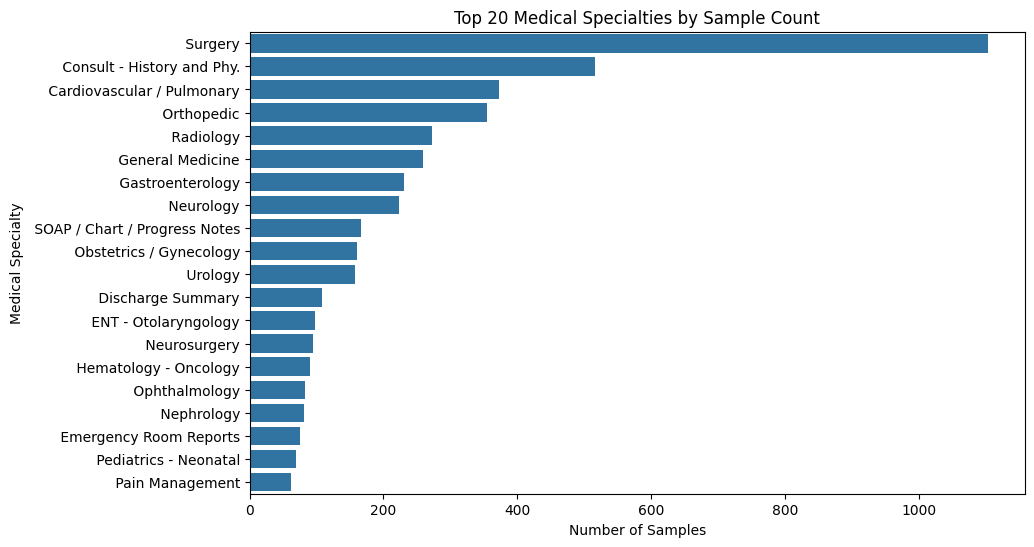

medical_specialty
Surgery                          1103
Consult - History and Phy.        516
Cardiovascular / Pulmonary        372
Orthopedic                        355
Radiology                         273
General Medicine                  259
Gastroenterology                  230
Neurology                         223
SOAP / Chart / Progress Notes     166
Obstetrics / Gynecology           160
Name: count, dtype: int64

In [11]:
# Explore label distribution
specialty_counts = df['medical_specialty'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(y=specialty_counts.index[:20], x=specialty_counts.values[:20])
plt.title('Top 20 Medical Specialties by Sample Count')
plt.xlabel('Number of Samples')
plt.ylabel('Medical Specialty')
plt.show()

specialty_counts.head(10)

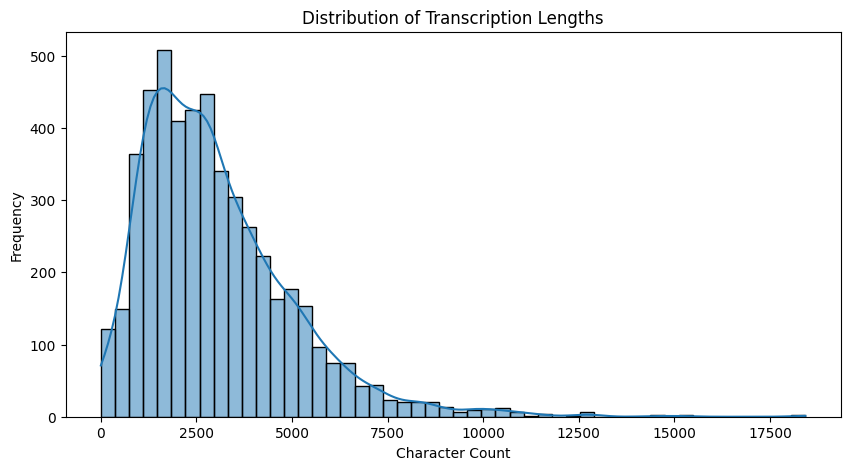

count     4999.000000
mean      3032.184837
std       2002.772490
min          3.000000
10%        990.400000
50%       2659.000000
90%       5527.000000
95%       6639.100000
max      18425.000000
Name: text_length, dtype: float64

In [12]:
# Text length analysis
df['text_length'] = df['transcription']. astype(str).apply(len)

plt.figure(figsize=(10,5))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title('Distribution of Transcription Lengths')
plt.xlabel("Character Count")
plt.ylabel('Frequency')
plt.show()

df['text_length'].describe(percentiles=[.1, .5, .9, .95,])

In [13]:
# Sample Review

df[['medical_specialty', 'transcription']].sample(5, random_state=42)

,medical_specialty,transcription
84,Urology,"OPERATIVE NOTE: ,The patient was taken to the..."
2470,Office Notes,"VITAL SIGNS:, Reveal a blood pressure of *, t..."
2804,Neurology,"HISTORY: , Neurologic consultation was request..."
4987,Autopsy,"ANATOMICAL SUMMARY,1. Sharp force wound of nec..."
4924,Cardiovascular / Pulmonary,"INDICATIONS FOR PROCEDURE:, The patient has pr..."
